# Prediction using Unsupervised ML (Clustering)

#Problem Statement:
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban, and rural areas. Customer first applies for a home loan and after that company validates the customer eligibility for the loan.A marketing firm wants to launch a promotional campaign in different regions of the country. So, in order to do that, they need to understand which areas they should focus their resources in order to cover the entire region. We are provided with the population data based on different locations along with the demographics. The objective is to segregate the regions into different groups so that the marketing team can plan their resources accordingly. So, we have to apply classification techniques in order to segregate the regions into different clusters which will help the marketing team.

In [66]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [67]:
pwd

'C:\\Users\\P . D YALMAR'

In [68]:
##Loading the dataset
data=pd.read_csv('Population_Data.csv')

In [69]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


# Checking Null Values Present or Not

In [70]:
data.isnull().sum()

Region                0
Office Location Id    0
Indians               0
Foreigners            0
Indian_Male           0
Indian_Female         0
Foreigners_Male       0
Foreigners_Female     0
Total Population      0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null object
Foreigners            38 non-null object
Indian_Male           38 non-null object
Indian_Female         38 non-null object
Foreigners_Male       38 non-null object
Foreigners_Female     38 non-null object
Total Population      38 non-null object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [72]:
#Isolating numerical columns
numeric=["Indians","Foreigners","Indian_Male","Indian_Female","Foreigners_Male","Foreigners_Female","Total Population" ]

In [73]:
#Function to remove comma from the numeric data
def cleaner(z):
    return z.replace(',','')

In [74]:
for i in data[numeric]:
    data[i]=data[i].apply(cleaner)
    

In [75]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [76]:
# Converting numerical columns to numeric datatype
data[numeric]=data[numeric].apply(pd.to_numeric)
data.info() #getting information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null int64
Foreigners            38 non-null int64
Indian_Male           38 non-null int64
Indian_Female         38 non-null int64
Foreigners_Male       38 non-null int64
Foreigners_Female     38 non-null int64
Total Population      38 non-null int64
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [77]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [78]:
#checking whether Indian + Foreigner population = Total Population
data[['Indians','Foreigners']].sum().sum()-data['Total Population'].sum()

0

In [79]:
#checking whether Indian(male+female) +Foreigner(male+female) = Total population
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum()-data['Total Population'].sum()

-112859

In [80]:
# Storing the difference as new column "others"
MF_sum=data['Indian_Male']=data['Indian_Female']+data['Foreigners_Male']+data['Foreigners_Female']
data['other']=data['Total Population']-MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,3039384,203151,2763718,72515,3527378,487994
1,Region 17,9,319933,1501899,1583430,106456,1449303,27671,1821832,238402
2,Region 12,4,194379,650744,674888,32576,631660,10652,845123,170235
3,Region 22,15,107360,470708,478673,22017,450267,6389,578068,99395
4,Region 23,13,55351,329980,352344,23555,325105,3684,385331,32987


In [81]:
#checking the unique office location ids
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [82]:
#dropping office location ids
data1=data.drop(columns=['Region','Office Location Id','Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,3039384,203151,2763718,72515,487994
1,319933,1501899,1583430,106456,1449303,27671,238402
2,194379,650744,674888,32576,631660,10652,170235
3,107360,470708,478673,22017,450267,6389,99395
4,55351,329980,352344,23555,325105,3684,32987


In [83]:
#scaling the data

from sklearn.preprocessing import Normalizer
scaler=Normalizer()
columns=data1.columns
data1=scaler.fit_transform(data1)

data2=pd.DataFrame(data1,columns=columns)
data2.head()


,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.126485,0.566745,0.597325,0.039925,0.543149,0.014251,0.095905
1,0.120625,0.566262,0.597001,0.040137,0.546432,0.010433,0.089885
2,0.167551,0.560929,0.581741,0.028080,0.544479,0.009182,0.146739
3,0.130639,0.572773,0.582465,0.026791,0.547899,0.007774,0.120947
4,0.094449,0.563064,0.601225,0.040193,0.554746,0.006286,0.056288


# Finding optimum no of clusters 

In [84]:
SSE=[]
for cluster in range(1,10):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data2)
    SSE.append(kmeans.inertia_)

C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.2

In [85]:
frame=pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

# Plotting line graph to know optimum number of clusters by elbow method

Text(0, 0.5, 'Inertia')

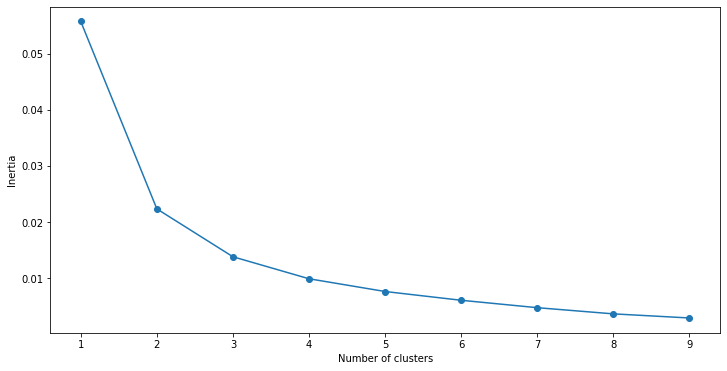

In [86]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
         

# Applying kmeans to the dataset

In [87]:
# applying k-means prediction method
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data2)
prediction=kmeans.predict(data2)


In [88]:
data2['Cluster']=prediction
prediction

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [89]:
kmeans.inertia_

0.022346178334518848

# Visualizing the cluster

In [90]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data2[str_x][data2['Cluster']==i])
    y.append(data2[str_y][data2['Cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()
  return ''

In [91]:
data2.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other,Cluster
0,0.126485,0.566745,0.597325,0.039925,0.543149,0.014251,0.095905,1
1,0.120625,0.566262,0.597001,0.040137,0.546432,0.010433,0.089885,1
2,0.167551,0.560929,0.581741,0.028080,0.544479,0.009182,0.146739,1
3,0.130639,0.572773,0.582465,0.026791,0.547899,0.007774,0.120947,1
4,0.094449,0.563064,0.601225,0.040193,0.554746,0.006286,0.056288,0


C:\Users\P . D YALMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

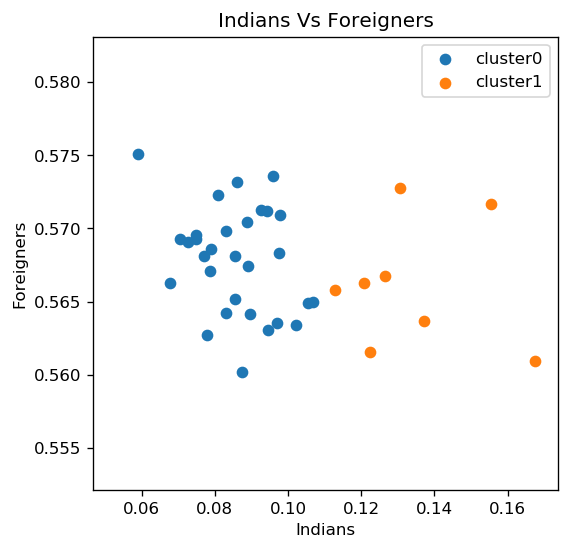

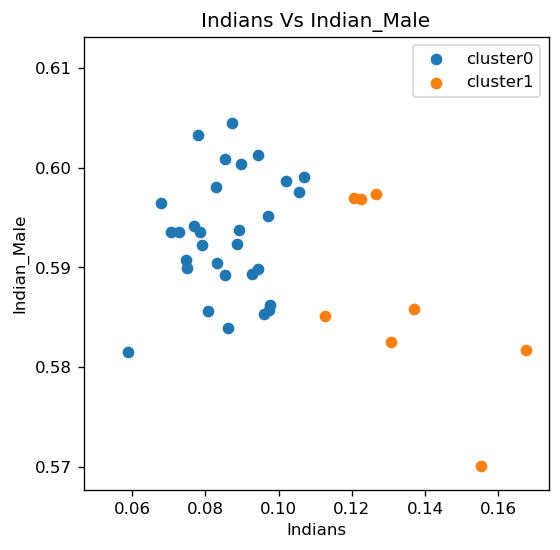

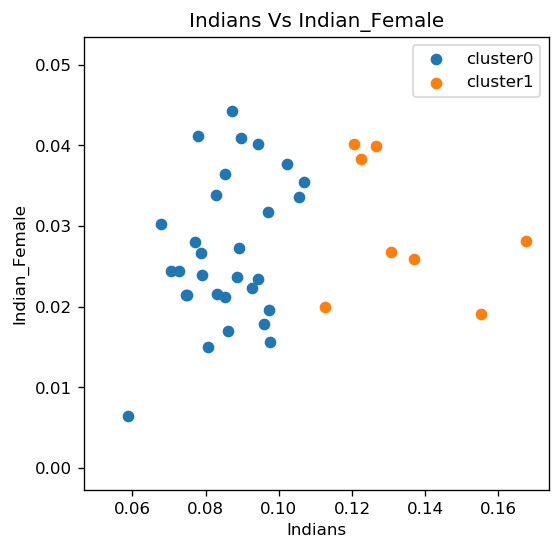

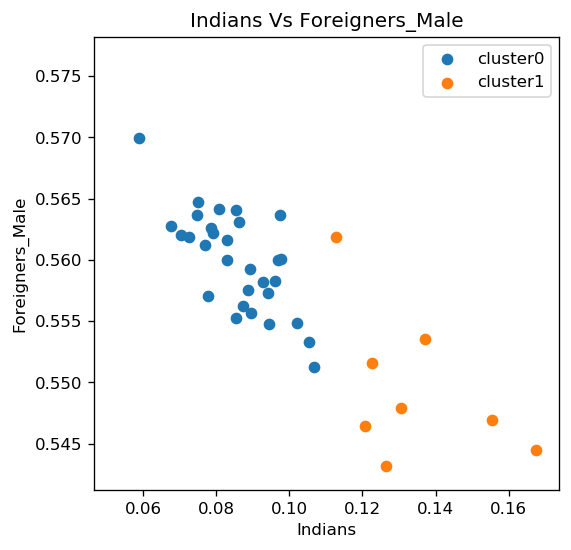

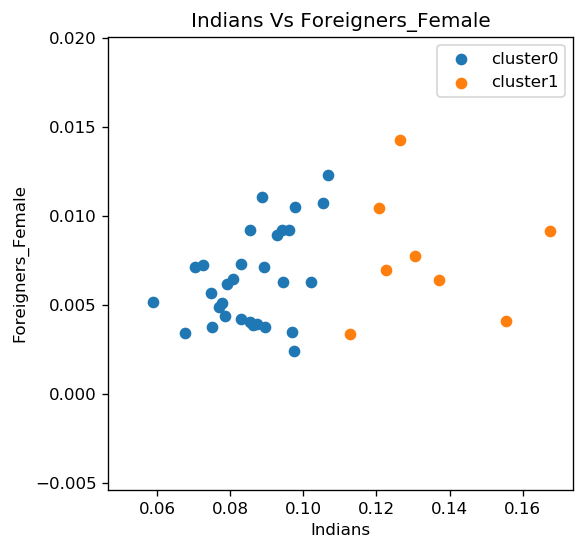

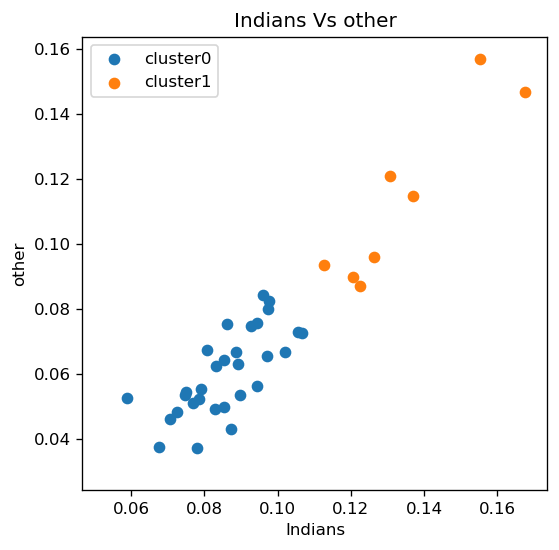

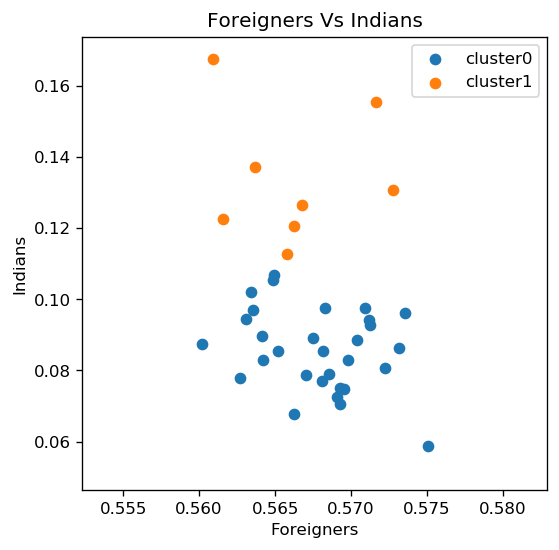

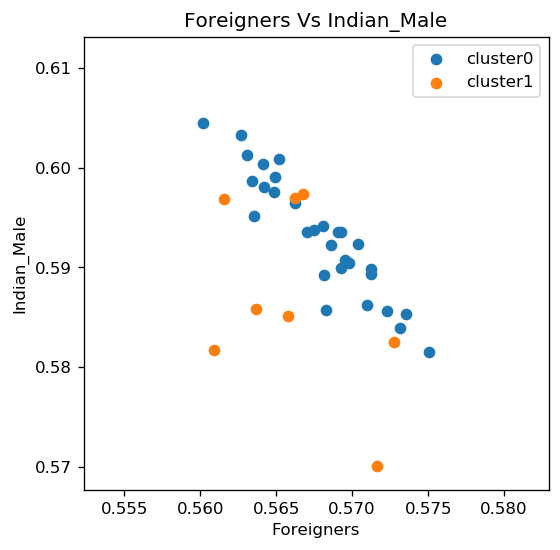

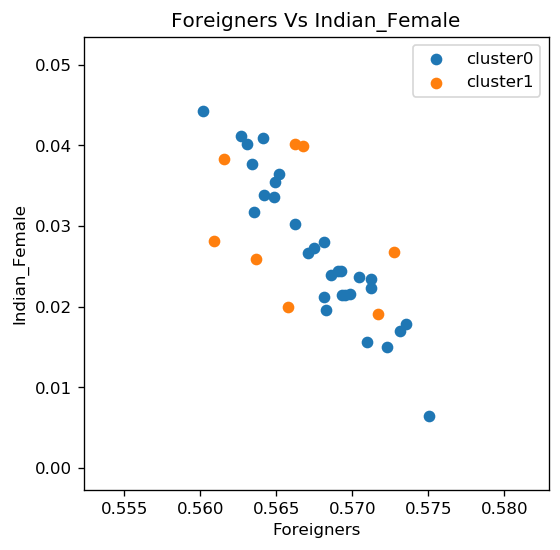

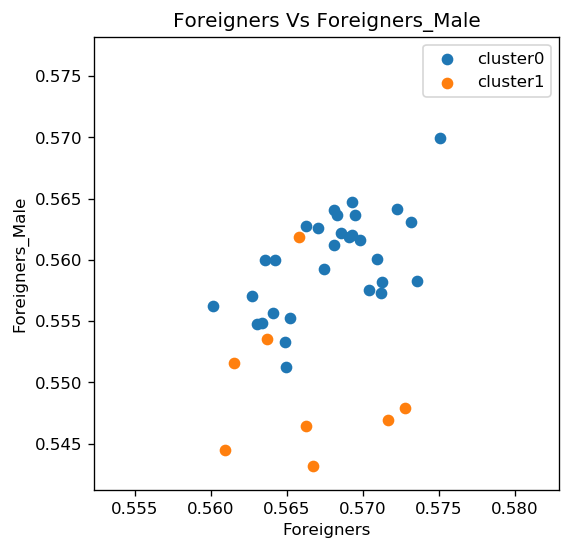

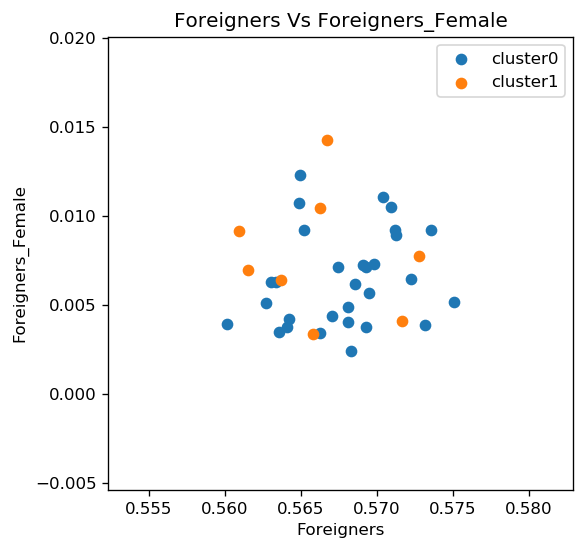

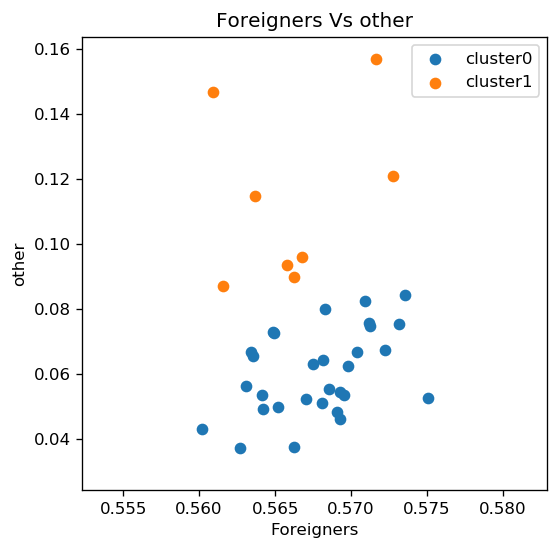

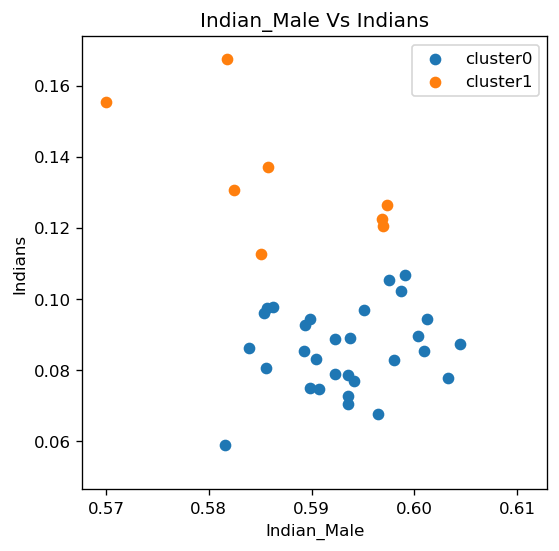

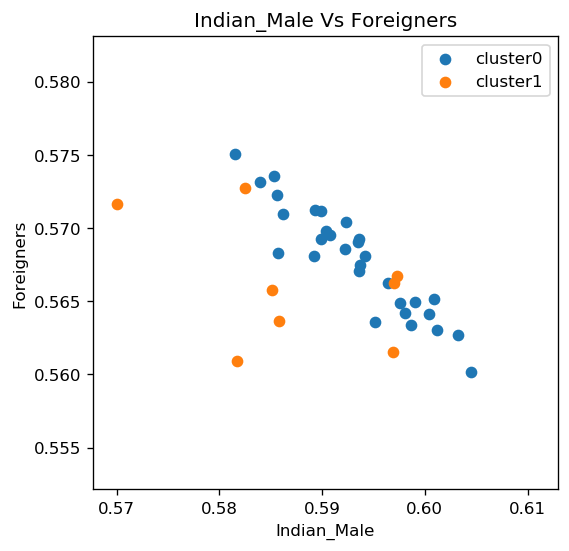

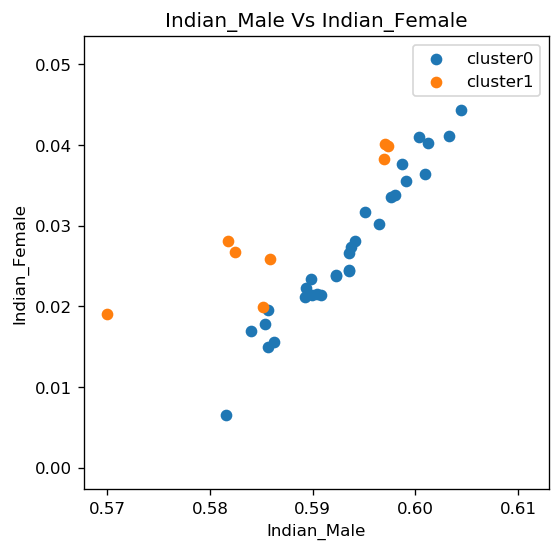

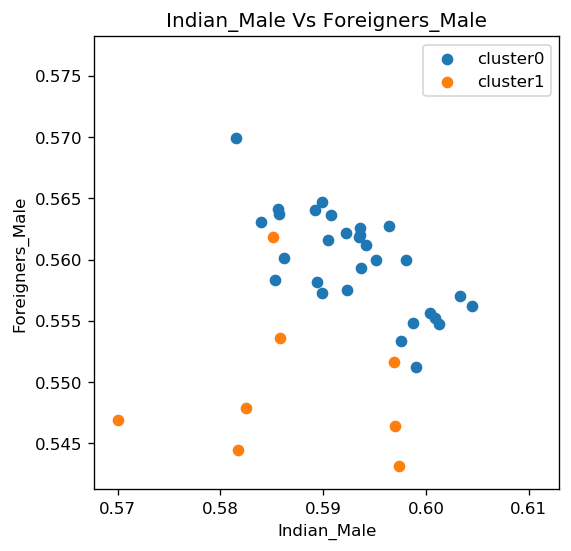

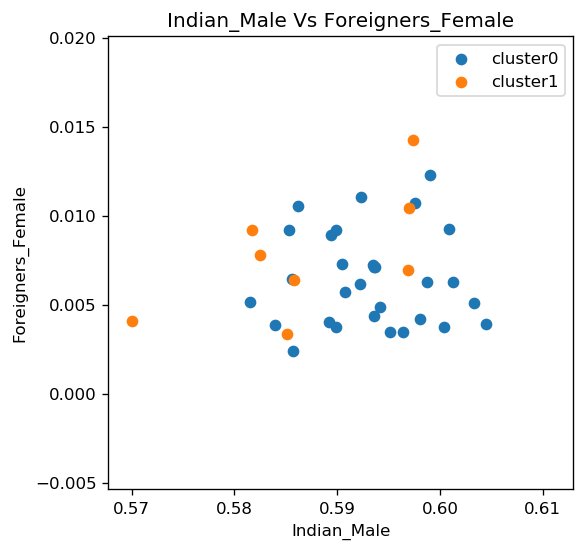

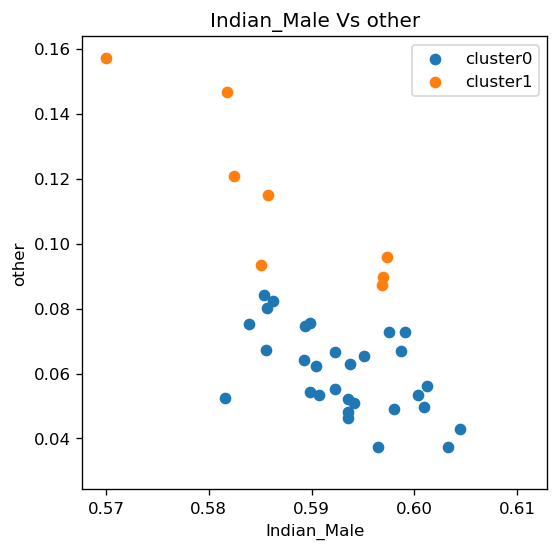

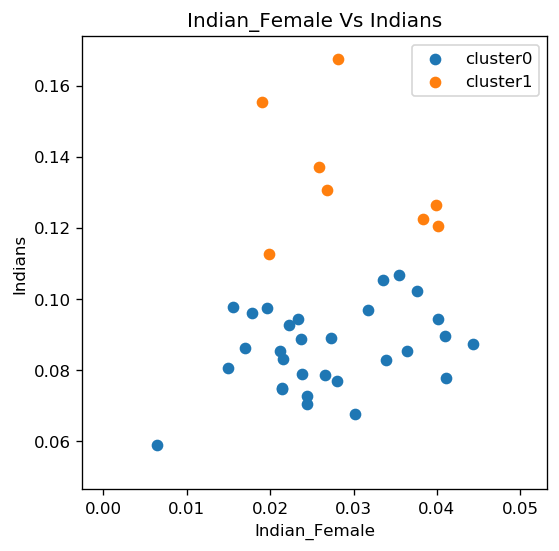

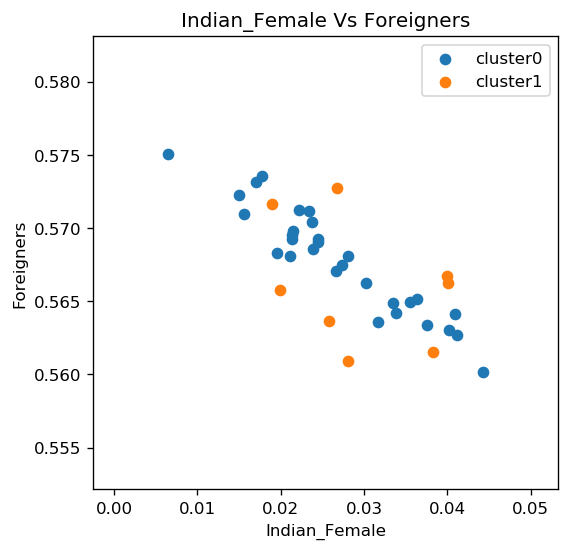

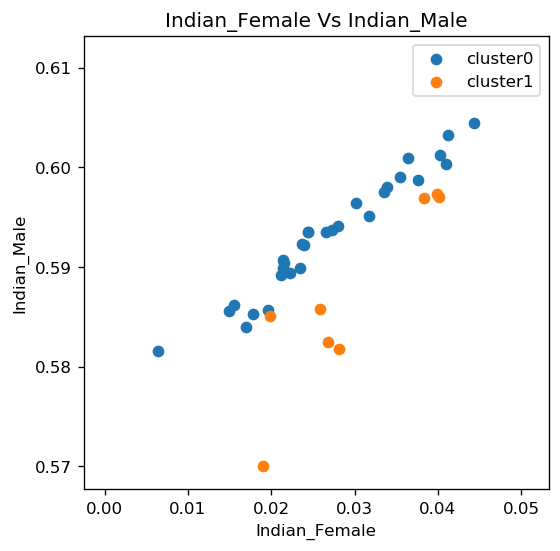

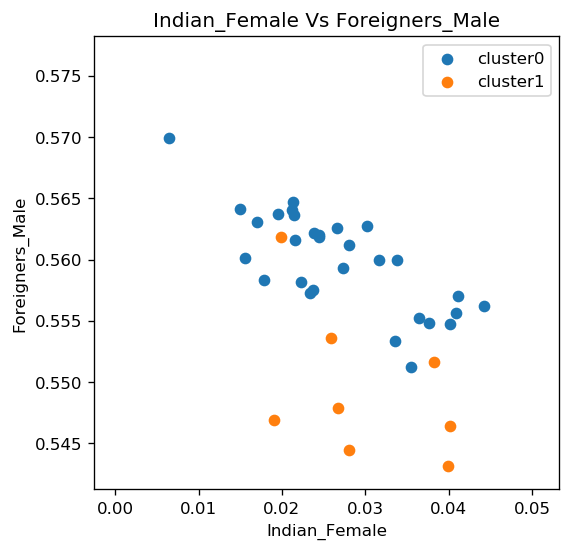

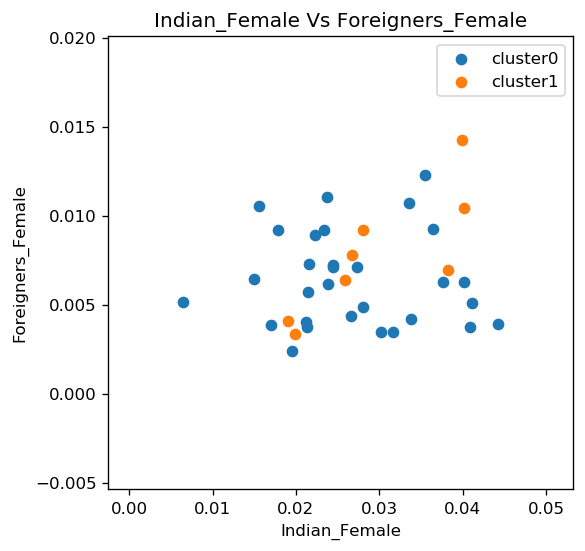

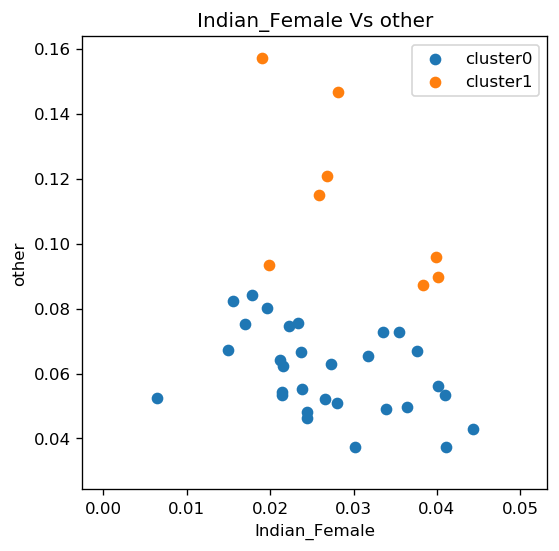

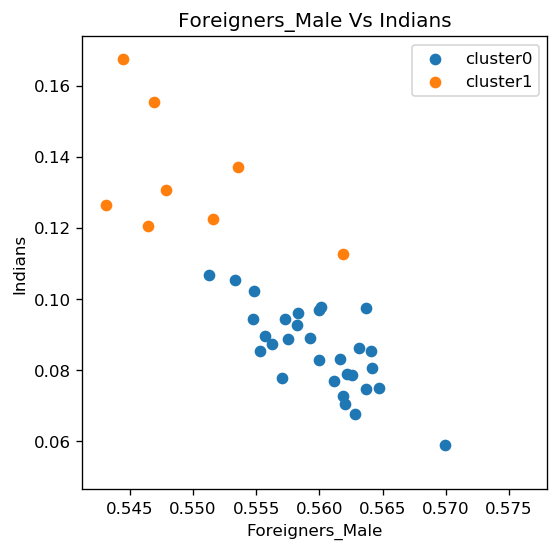

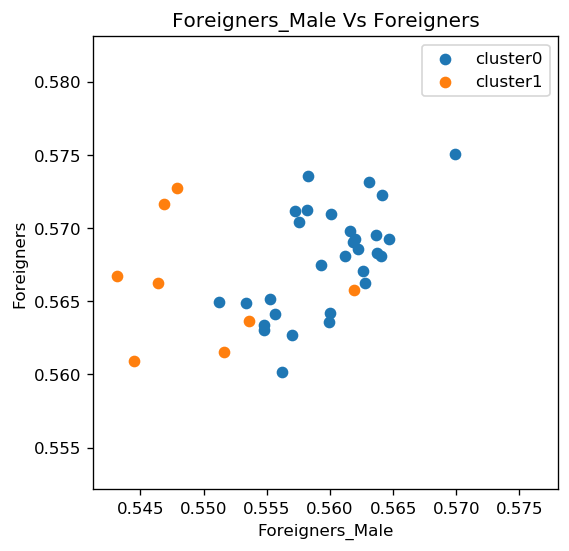

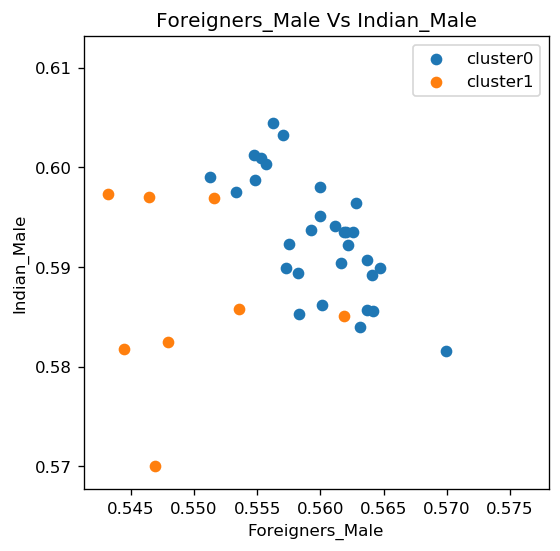

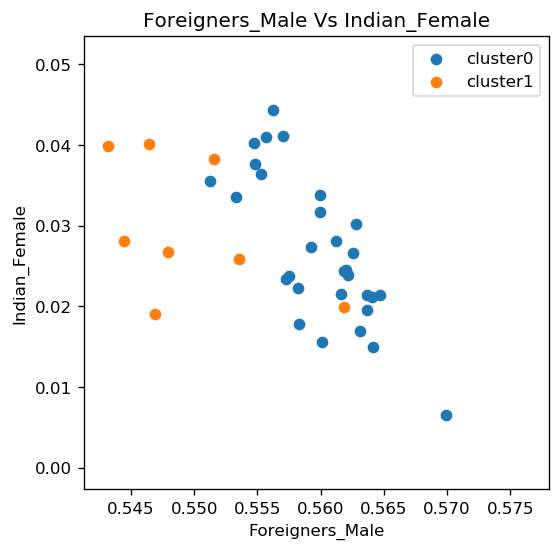

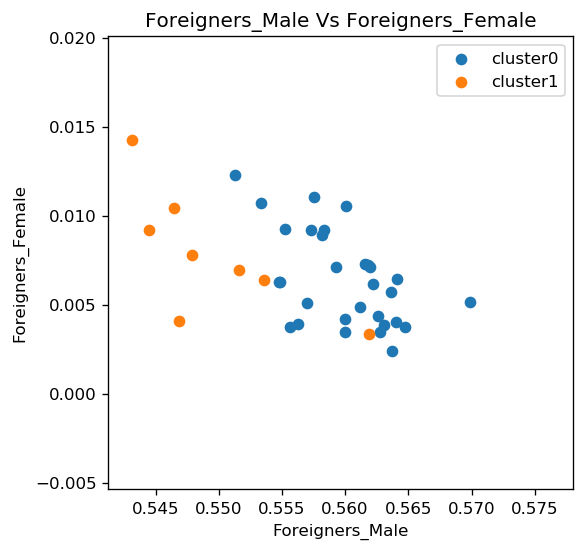

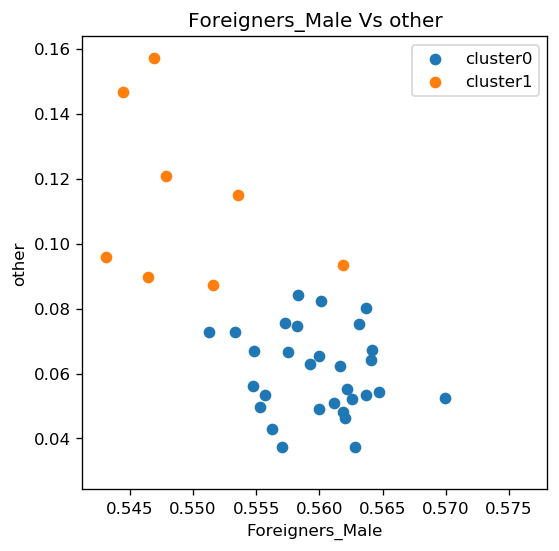

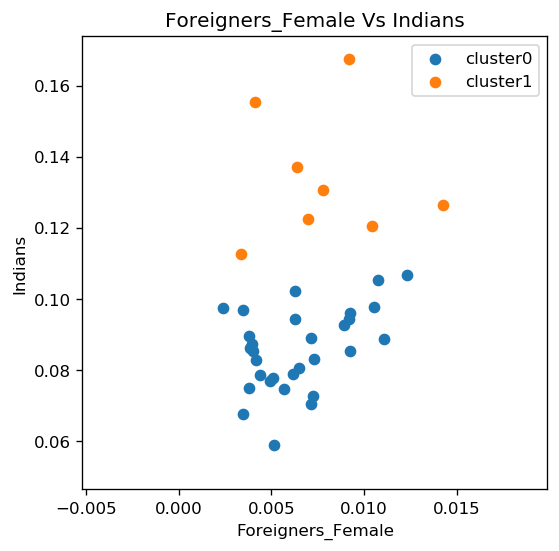

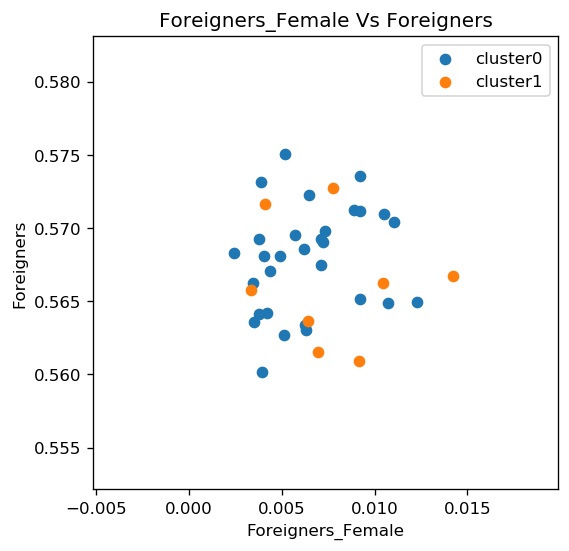

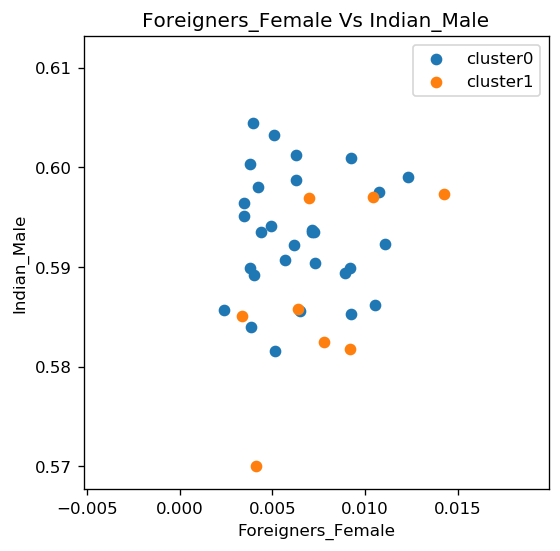

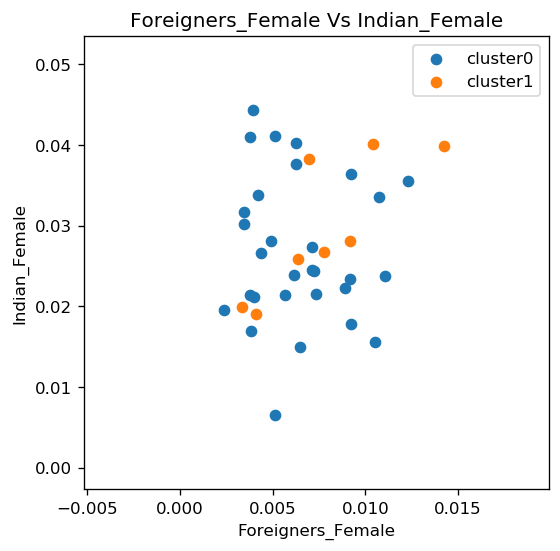

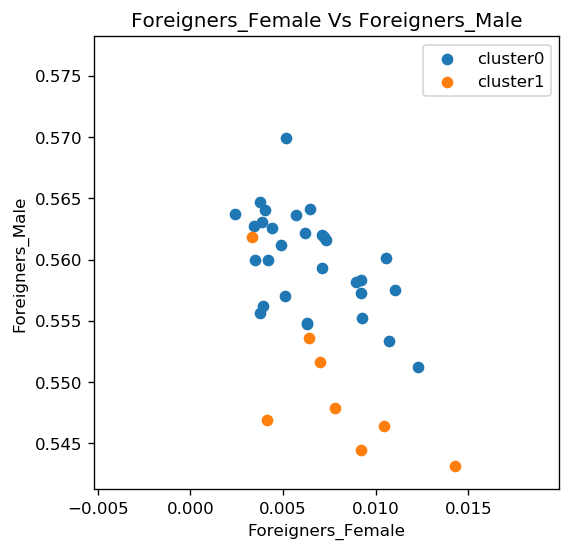

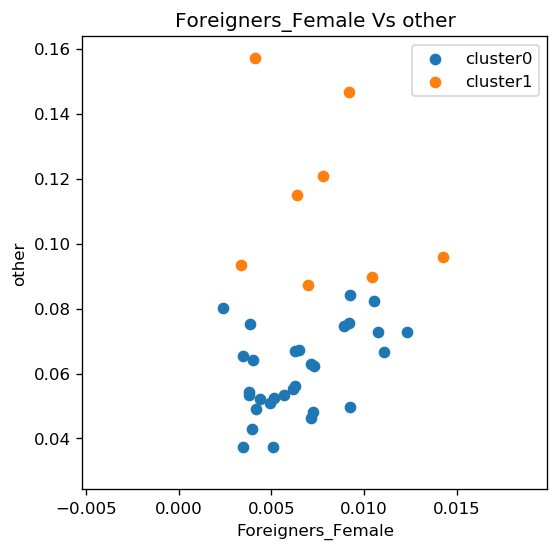

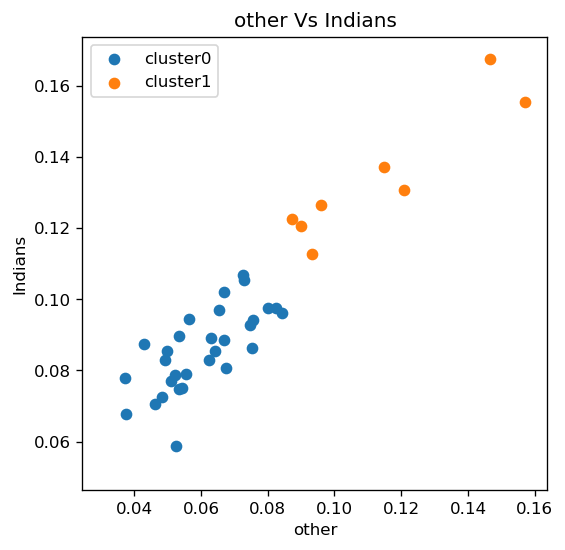

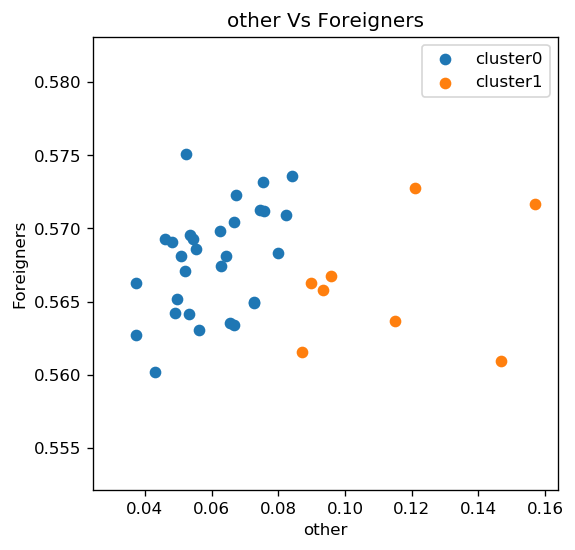

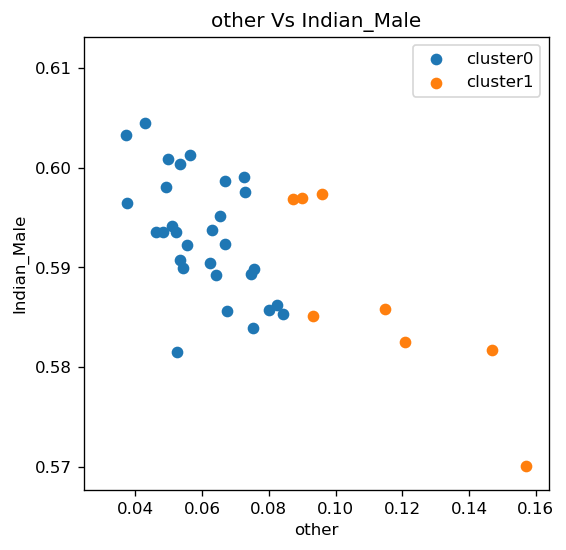

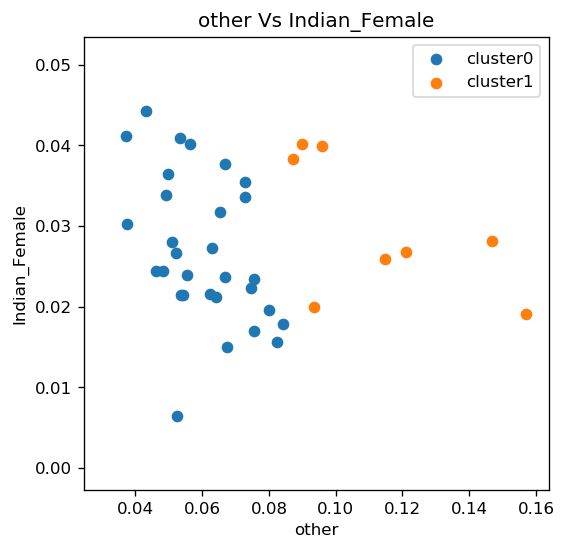

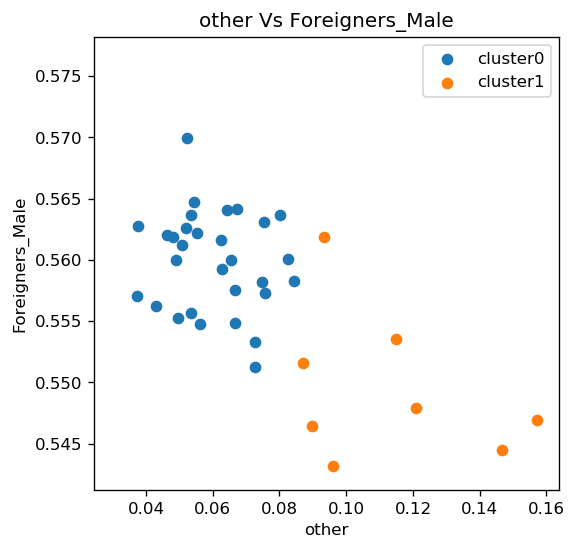

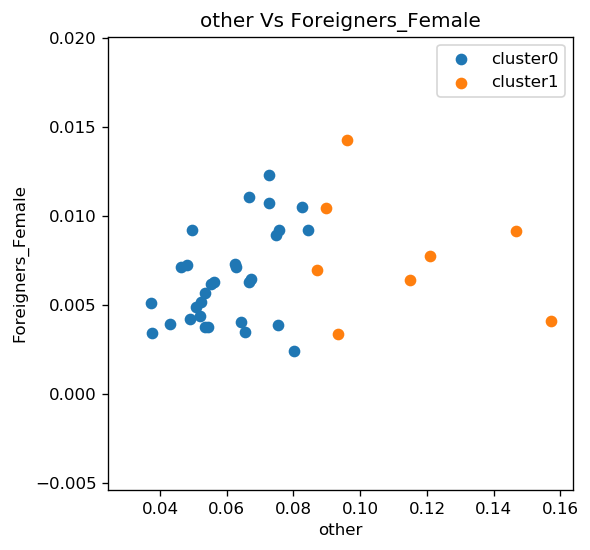

In [92]:
[plot_clusters(x,y,2) for x in data2.drop(columns=['Cluster']).columns for y in data2.drop(columns=['Cluster']).columns if x!=y]

''

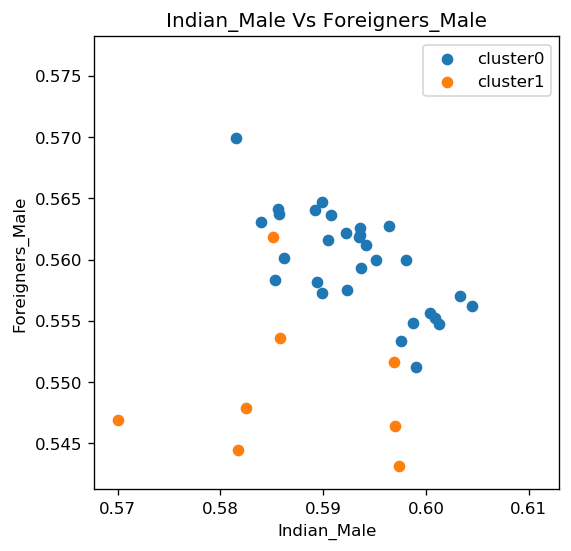

In [93]:
plot_clusters('Indian_Male', 'Foreigners_Male',2)

''

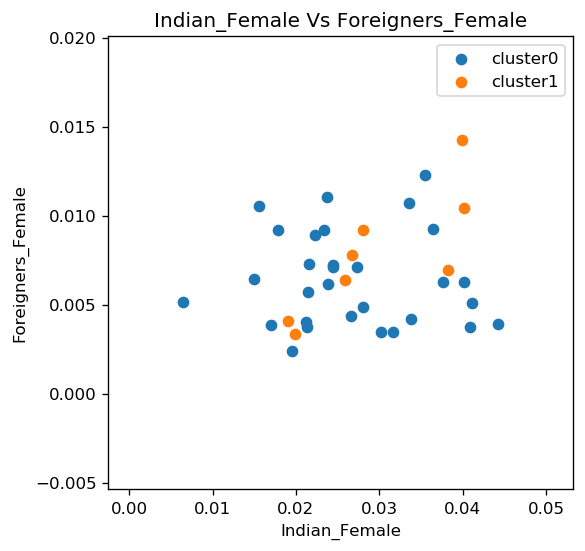

In [94]:
plot_clusters('Indian_Female', 'Foreigners_Female',2)

''

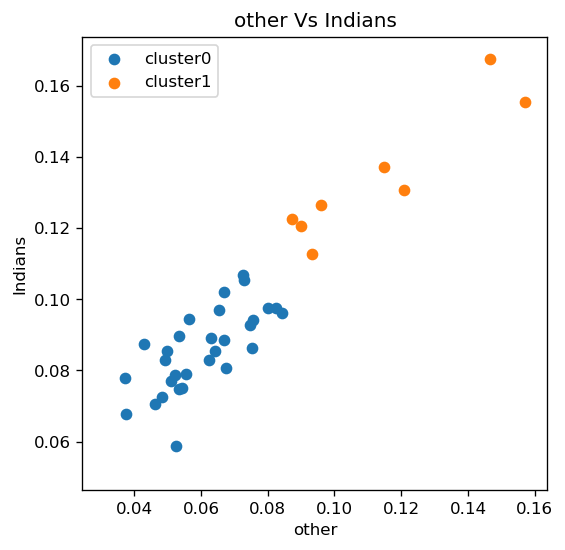

In [95]:
plot_clusters('other', 'Indians',2)